### RandomForestClassifier

#### 随机森林是非常具有代表性的Bagging集成算法，他的所有基评估器都是决策树，分类树组成的森林就叫做随机森林分类器，回归树所组成的

##### 森林就叫做随机森林回归器、RandomForestClassifier是随机森林分类器

### n_estimators
#### 随机森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性是单调的，n_estimators越大，模型效果往往越好。但是相应的，其的影响是有极限的，它只会无限接近极限并随之波动，然而其调用的内存会越来越大.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #导入随机森林分类器
from sklearn.datasets import load_wine

In [5]:
wine=load_wine()
wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
clf=DecisionTreeClassifier(random_state=0)
rcf=RandomForestClassifier(random_state=0)#随机森林也有random_state,固定一种森林模型
clf=clf.fit(xtrain,ytrain)
rcf=rcf.fit(xtrain,ytrain)
score_c=clf.score(xtest,ytest)
score_r=rcf.score(xtest,ytest)
print('Single Tree:{}'.format(score_c))
print('Random Forest:{}'.format(score_r))

Single Tree:0.9074074074074074
Random Forest:0.9444444444444444


In [9]:
#交叉验证,随机森林比单调的一直精度高
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf=DecisionTreeClassifier()
rcf=RandomForestClassifier(n_estimators=25)
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)
rcf_s=cross_val_score(rcf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),clf_s,label='Random Forest')
plt.plot(range(1,11),rcf_s,label='Random Forest')
plt.legend()
plt.xticks(range(1,11))
plt.show()

<Figure size 640x480 with 1 Axes>

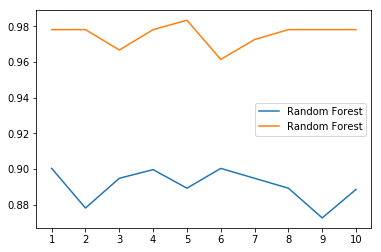

In [12]:
rcf_1=[]
clf_1=[]
for i in range(10):
    rcf=RandomForestClassifier(n_estimators=25)
    rcf_s=cross_val_score(rcf,wine.data,wine.target,cv=10).mean()
    rcf_1.append(rcf_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)
plt.plot(range(1,11),clf_1,label='Random Forest')
plt.plot(range(1,11),rcf_1,label='Random Forest')
plt.legend()
plt.xticks(range(1,11))
plt.show()

#### 学习曲线

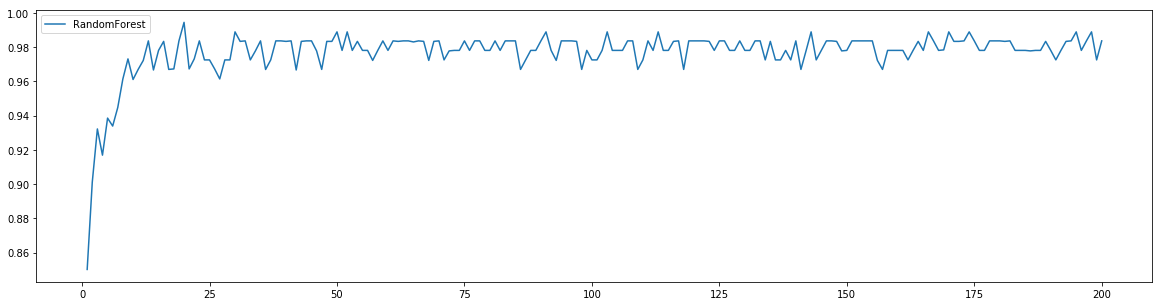

0.9944444444444445 19


In [33]:
superpa=[]
for i in range(200):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
plt.figure(figsize=(20,5))
plt.plot(range(1,201),superpa,label='RandomForest')
plt.legend()
plt.show()
print(max(superpa),superpa.index(max(superpa)))

### 随机森林的本质是一种装袋集成算法，装袋集成算法是对基评估器的预测结果进行平均或者多数表决原则来决定集成估器的结果.在刚刚红酒例子中，我们建立了25棵树，对任何一个样本而言，平均或多数表决原则下，当且仅当有13棵树判断错误时，随机森林才会判断错误.单独一棵决策树判断正确的概率在0.85上下浮动，一颗树判断错误的概率为0.2，那13棵以上的树判断错误的概率经过计算为0.000369，很小的.

In [13]:
import numpy as np
from scipy.special import comb
n=np.array([comb(25,i)*(0.2**i)*(1-0.2)**(25-i) for i in range(13,26)]).sum() #13棵树判断错误的概率+15+16...+25棵的总概率
#comb(25,i)是从25个里面取i个的取法有多少种
print("%f"%n)

0.000369


#### DecisionTreeClassifier决策树自带随机性，所以随机森林挑选的决策树也具有随机性

### 随机森林的重要属性之一：estimators ,查看随机森林的状况

In [14]:
rfc=RandomForestClassifier(n_estimators=25,random_state=2)
rfc=rfc.fit(xtrain,ytrain)
rfc.estimators_#总览
rfc.estimators_[0]#第0棵数
rfc.estimators_[0].random_state#第0棵数的random_state参数

1872583848

In [15]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


#### 当random_state固定时，随机森林生成一组固定的树，但每棵树依然不一致，这是“随机挑选特征进行分支”的方法具有随机性.此随机性越大，袋装法越好.袋装法集成时基分类器应当是相互独立是不相同的.

#### 此方法局限性很强，需要成千上万棵树的时候，不能提供成千上万个特征进行建立这么多不同的树，所以除了random_state还需要其他随机性

#### bootstrap & oob_score_   ：   
#### 要是基分类器尽量都不一样，一种很容易理解的方法就是使用不同的训练集进行训练，而袋装法正是通过有放回的随机抽样技术来行成不同的训练集，bootstrap正是这个参数，默认为True即打开随机抽样.但是其也有自己的问题，因为有放回所以一些样本在一个自助集上可能出现多次，一般来说当自助集抽取的样本足够多时一个自助集会包含63％的原始数据.某一个样本被抽中的概率为1-（1-1/n）的n次方的差极限接近0.63因此有37％的数据会被浪费我们称之为袋带数据(out of bag data,简称oob)，oob_score 设置为True是看袋外数据测试的结果
#### 所以当特征值较多时，或者样本不多时可以设置bootstrap为False

In [22]:
rfc=RandomForestClassifier(n_estimators=25,oob_score=True)
rfc=rfc.fit(xtrain,ytrain)
score=rfc.score(xtest,ytest)
print(score)
rfc.oob_score_ #查看袋外数据的得分

0.9444444444444444


0.9516129032258065

In [24]:
rfc.feature_importances_#查看特征贡献值

array([0.06315219, 0.05427277, 0.00864792, 0.00494399, 0.03127607,
       0.05996637, 0.17583414, 0.02063566, 0.01169009, 0.20191992,
       0.07728908, 0.09774514, 0.19262665])

#### 接口fit,apply,predict,score，predict_proba

In [25]:
rfc.apply(xtest)#返回测试集中每一个样本在每一颗树的每一个叶子节点的索引

array([[11,  1,  2, ...,  2,  5,  1],
       [20, 12,  2, ...,  5,  5,  5],
       [ 8,  1,  4, ..., 10, 10, 14],
       ...,
       [21, 12, 12, ...,  5, 11, 13],
       [21, 12, 12, ..., 12, 22,  7],
       [20,  7, 11, ...,  5, 22,  1]], dtype=int64)

In [29]:
rfc.predict(xtest)#测试样本被分到哪个标签的结果

array([1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 1, 0, 0, 0, 1])

In [27]:
rfc.predict_proba(xtest)#每一个样本被分到每一个标签的概率

array([[0.04, 0.52, 0.44],
       [0.32, 0.68, 0.  ],
       [0.  , 0.08, 0.92],
       [0.04, 0.2 , 0.76],
       [0.76, 0.2 , 0.04],
       [0.88, 0.08, 0.04],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.52, 0.48, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.2 , 0.76, 0.04],
       [0.04, 0.96, 0.  ],
       [0.8 , 0.16, 0.04],
       [0.  , 0.96, 0.04],
       [0.24, 0.68, 0.08],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.  , 0.96, 0.04],
       [0.04, 0.88, 0.08],
       [0.  , 0.08, 0.92],
       [0.04, 0.08, 0.88],
       [0.24, 0.6 , 0.16],
       [0.92, 0.08, 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.04, 0.96],
       [0.  , 0.  , 1.  ],
       [0.04, 0.92, 0.04],
       [0.84, 0.16, 0.  ],
       [0.04, 0.92, 0.04],
       [0.04, 0.88, 0.08],
       [0.32, 0.56, 0.12],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.12, 0.84, 0.04],
 

#### Bonus:Bagging（袋装法）的另一个必要条件
#### 袋装法要求基评估器尽可能独立，但袋装法还有另一个条件是基评估器的准确率至少要超过随即分类率，即准去率必须高于50％.不然其随机器森林准去率超级低.

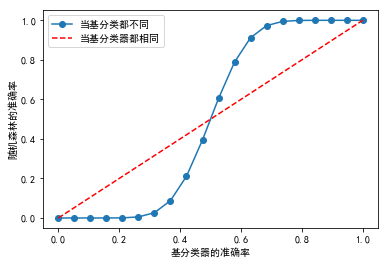

In [33]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
x = np.linspace(0,1,20)
y=[]
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,'o-',label="当基分类都不同")
plt.plot(x,x,'--',color="red",label="当基分类器都相同")
plt.xlabel("基分类器的准确率")
plt.ylabel("随机森林的准确率")
plt.legend()
plt.show()
#estimators 基评估器
#individual estimator's error 基分类器的准确率

### 随机森林回归器：RandomForestRegressor
#### 输入“mse”使用均方误差mean squared error（MSE），父节点和子节点之间的均方误差的差额将被用作为特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2的损失
#### “frideman_mse”使用费厄德曼均方误差
#### "mae"绝对平均误差

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor=RandomForestRegressor(random_state=0,n_estimators=100)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring="neg_mean_squared_error")#返回均方误差的负数

array([-10.60400153,  -5.34859049,  -5.00482902, -21.30948927,
       -12.21354202, -18.50599124,  -6.89427068, -93.92849386,
       -29.91458572, -15.1764633 ])

In [6]:
print(cross_val_score(regressor,boston.data,boston.target,cv=10).mean())
import sklearn
sorted(sklearn.metrics.SCORERS.keys())#sklearn各个指标

0.4694330962448762


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

#### 用随机森林填补收集数据中缺失的数据:sklearn.impute.SimpleImputer来用均值,中值,或者其他重要数据来弥补缺失值。

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
datset=load_boston()
datset.data.shape#共506*13个数值

(506, 13)

In [45]:
x_full,y_full=datset.data,datset.target
n_samples=x_full.shape[0]#506
n_features=x_full.shape[1]#13

In [46]:
datset.target.shape

(506,)

In [47]:
#缺失率为0.5
rng=np.random.RandomState(0)
missing_rate=0.5
n_missing_samples=int(np.floor(n_samples*n_features*missing_rate))#np.floor 向下取整,3289

In [48]:
#创造一个数组有3289个数在0-506个行索引中，3289个数在0-13个列索引中
missing_features=rng.randint(0,n_features,n_missing_samples)#从0到506中取出1644个数
missing_samples=rng.randint(0,n_samples,n_missing_samples)#从0到13中取出1644个数
# missing_samples = rng.choice(n_samples,n_missing_samples,replace=False) replace=False 会随机抽取不重复的值

In [54]:
x_missing=x_full.copy()
y_missing=y_full.copy()#对y不操作
x_missing[missing_samples,missing_features]=np.nan
pd.DataFrame(x_missing).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [23]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')#空值用平均数替代,strategy还可以为median(中值)，most_frequent(众数),constant(常数)
x_missing_mean=imp_mean.fit_transform(x_missing)#fit_transform >>> fit和predict的结合

In [24]:
pd.DataFrame(x_missing_mean).isnull().sum()#没有空值了

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [25]:
x_missing_mean

array([[3.62417889e+00, 1.22554745e+01, 1.11465549e+01, ...,
        1.84765101e+01, 3.96900000e+02, 4.98000000e+00],
       [3.62417889e+00, 0.00000000e+00, 7.07000000e+00, ...,
        1.78000000e+01, 3.96900000e+02, 1.28602365e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.84765101e+01, 3.59169968e+02, 4.03000000e+00],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.11465549e+01, ...,
        2.10000000e+01, 3.59169968e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.11465549e+01, ...,
        1.84765101e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.59169968e+02, 1.28602365e+01]])

In [27]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
x_missing_mean=imp_mean.fit_transform(x_missing)

In [28]:
x_missing_mean

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        4.9800e+00],
       [0.0000e+00, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        0.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 0.0000e+00, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        0.0000e+00]])

#### 回归是从特征矩阵中学习的，补全的方法是
##### 特征T不缺的值对应其他n-1个特征+本来的标签：x_train
##### 特征T不缺的值：y_train
##### 特征T缺失的值对应其他n-1个特征+本来的标签：x_test
##### 特征T不缺的值：y_test
##### 此方法对仅个别特征大量缺失但其他特征相对完善非常友好，如果很多特征都有缺失值则会遍历，先从缺失最少的特征开始补全；填补特征值时，先将其他特征缺失值用0来替代，每完成一次回归，将预测值放到原来的特征矩阵中，再继续填补下一个特征。

In [63]:
x_missing_reg=pd.DataFrame(x_missing).copy()
sortedindex = np.argsort(x_missing_reg.isnull().sum())#找出特征值缺失从少到多排序索引
print(sortedindex)
print(x_missing_reg.isnull().sum())
sortedindex=sortedindex.values
sortedindex
# sortednumber=np.sort(x_missing_reg.isnull().sum()) #缺失值从小到大排列
# print(sortedmunber) 

0      6
1     12
2      8
3      7
4      9
5      0
6      2
7      1
8      5
9      4
10     3
11    10
12    11
dtype: int64
0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64


array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [58]:
x_missing_reg.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [64]:
for i in sortedindex:
    #构建新特征矩阵和新标签
    df= x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    #在新特征矩阵中，对缺失值的列，0填补
    df_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    #找出我们的训练集和测试集
    ytrain = fillc[fillc.notnull()]
    ytest = fillc[fillc.isnull()]
    xtrain = df_0[ytrain.index,:]
    xtest = df_0[ytest.index,:]
    #随机森林来填补缺失值
    rfc= RandomForestRegressor(n_estimators=100)
    rfc= rfc.fit(xtrain,ytrain)
    ypredict=rfc.predict(xtest)
    #将填好的特征放回特征矩阵
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i]=ypredict
x_missing_reg.head(10)#因为缺失值太多了所以误差很大

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.240668,18.000,7.0855,0.17,0.538000,6.68899,65.200,4.090000,1.00,296.00,18.344,390.3375,4.9800
1,0.027310,0.000,5.8010,0.00,0.469000,6.10540,78.900,4.967100,2.00,290.77,18.640,396.9000,9.1400
2,0.027290,12.790,7.0700,0.00,0.471019,7.18500,61.100,4.152589,2.00,242.00,17.932,387.2101,4.8202
3,0.092451,17.895,3.1883,0.00,0.458000,6.87887,45.800,4.594400,3.47,222.00,18.700,393.7891,5.9063
4,0.077629,0.000,2.1800,0.00,0.461004,7.14700,58.159,5.100998,3.85,237.37,18.700,393.5749,5.3300
5,0.058877,0.000,4.0341,0.00,0.460270,6.43000,58.700,6.062200,3.30,222.00,18.700,390.3566,5.2100
6,0.256711,12.500,8.7199,0.00,0.524000,6.04608,66.600,5.560500,4.33,303.84,15.200,391.4339,12.4300
7,0.468419,12.500,8.9990,0.40,0.524000,6.45976,96.100,5.950500,4.95,311.00,15.200,396.9000,19.1500
8,0.372608,14.980,7.8700,0.00,0.524000,5.63100,76.930,6.082100,5.00,311.00,17.529,377.3261,29.9300
9,0.170040,17.260,7.8700,0.00,0.524000,5.84839,66.279,6.592100,5.39,311.00,17.383,386.7100,14.3526


In [61]:
pd.DataFrame(datset.data).head(10)#因为缺失值太多了所以误差很大

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [72]:
from sklearn.model_selection import cross_val_score
lists=[]
for i in [x_full,x_missing_mean,x_missing_reg]:
    estimator=RandomForestRegressor(random_state=0,n_estimators=10)
    score_list=cross_val_score(estimator,i,y_full,scoring="neg_mean_squared_error",cv=5).mean()
    lists.append(score_list*-1)
print(lists)

[22.243894632110266, 48.802995695981366, 21.23873728208115]


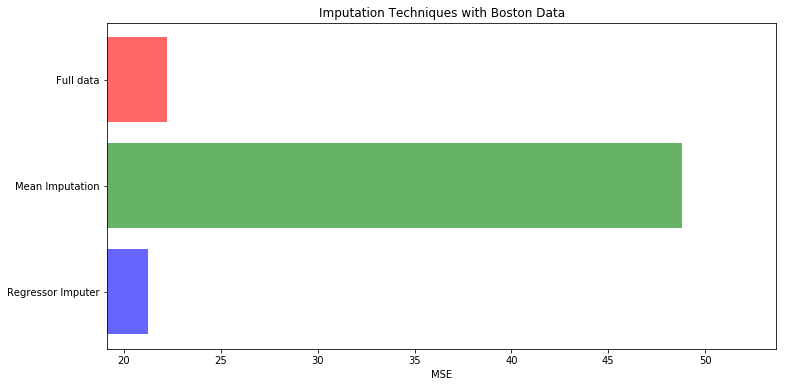

In [100]:
x_label=['Full data','Mean Imputation','Regressor Imputer']
colors=['r','g','b']
plt.figure(figsize=(12,6))
ax=plt.subplot(111)#添加子图
# for i in [0,1,2]:
#     ax.barh(i,lists[i],color=colors[i],alpha=0.6,align="center")#横条形图，alpha颜色明显度，aligin居中/////{和下面一行代码一样}
ax.barh([0,1,2],lists,color=colors,alpha=0.6,align="center")#横条形图，alpha颜色明显度，aligin居中
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(lists)*0.9,right=np.max(lists)*1.1)#x显示范围
ax.set_yticks(np.arange(len(lists)))
ax.set_xlabel('MSE')
ax.invert_yaxis()
ax.set_yticklabels(x_label)
plt.show()

### 随机森林在乳腺癌上调参

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
data=load_breast_cancer()
data.data.shape

(569, 30)

In [10]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)#实例化
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

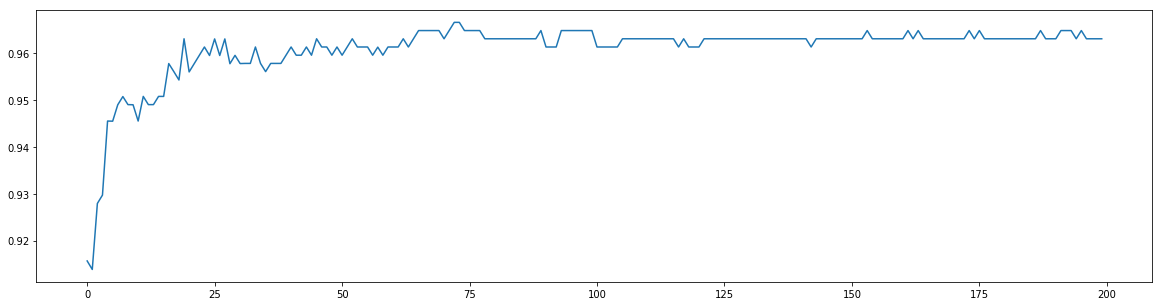

0.9666353383458647 72


In [26]:
#跑一遍学习曲线,n_estimators和泛化误差无关
score_list=[]
for i in range(0,200):
    rfc=RandomForestClassifier(n_estimators=i+1,random_state=90)#,n_jobs=-1 CPU全开跑程序,手动调节，没调节开不了
    score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score_list.append(score_pre)
plt.figure(figsize=(20,5))
plt.plot(range(0,200),score_list)
plt.show()
print(max(score_list),score_list.index(max(score_list)))

In [27]:
print(max(score_list),score_list.index(max(score_list))+1)

0.9666353383458647 73


##### 调参首先调max_depth,影响大

In [28]:
# {"criterion":('gini','entropy')
#  ,"splitter":('best','random')
#  ,'max_depth':[*range(1,10)]
#  ,'min_samples_leaf':[*range(1,50,5)]
#  ,'min_impurity_decrease':[*gini_threholds]}
parameters_1={'max_depth':[*range(1,20)]}#
rfc=RandomForestClassifier(n_estimators=73,random_state=90)
GS=GridSearchCV(rfc,parameters_1,cv=10)
GS.fit(data.data,data.target)
GS.best_score_#分数没有怎加，可以猜测泛化误差在最佳点左边，所以只能调节max_features,因为其它都时简化模型,而现在猜测模型学习不足

0.9666353383458647

In [23]:
GS.best_params_

{'max_depth': 8}

In [29]:
parameters_2={'max_features':np.arange(5,30,1)}
rfc=RandomForestClassifier(n_estimators=73,random_state=90)
GS=GridSearchCV(rfc,parameters_2,cv=10)
GS.fit(data.data,data.target)
GS.best_score_

0.9666666666666668

In [30]:
GS.best_params_

{'max_features': 24}

In [31]:
#不死心
parameters_3={'min_samples_leaf':[*range(1,50,5)]}
rfc=RandomForestClassifier(n_estimators=73,random_state=90)
GS=GridSearchCV(rfc,parameters_3,cv=10)
GS.fit(data.data,data.target)
GS.best_score_#没有用

0.9666666666666668

In [ ]:
#0.9666666666666668即数据模型最佳参数，fan'hua